<h1>Bengali.AI Handwritten Grapheme - Getting Started</h1>

# Introduction

Bengali is the 5th most spoken language in the world with hundreds of million of speakers. Optical character recognition is particularly challenging for Bengali. While Bengali has 49 letters (to be more specific 11 vowels and 38 consonants) in its alphabet, there are also 18 potential diacritics, or accents. This means that there are many more graphemes, or the smallest units in a written language. The added complexity results in ~13,000 different grapheme variations (compared to English’s 250 graphemic units).

Bangladesh-based non-profit Bengali.AI is focused on helping to solve this problem. They build and release crowdsourced, metadata-rich datasets and open source them through research competitions. Through this work, Bengali.AI hopes to democratize and accelerate research in Bengali language technologies and to promote machine learning education.

For this competition, we are given the image of a handwritten Bengali grapheme and are challenged to separately classify three constituent elements in the image: grapheme root, vowel diacritics, and consonant diacritics.

# Prepare for data analysis

## Load packages

In [1]:
import os
import pandas as pd
import numpy as np
import PIL.Image
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

## Check the data

We verify what data is available.

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/train.csv
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet
/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet


We have both csv files and parquet files.  
We will start by exploring csv files and will follow with parquet files.

# Data exploration

We start with the few csv files.

In [3]:
DATA_FOLDER = '/kaggle/input/bengaliai-cv19/'
train_df = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [4]:
train_df.shape

(200840, 5)

In [5]:
test_df = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
test_df.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [6]:
test_df.shape

(36, 3)

In [7]:
class_map_df = pd.read_csv(os.path.join(DATA_FOLDER, 'class_map.csv'))
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [8]:
class_map_df.shape

(186, 3)

In [9]:
sample_submission_df = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
sample_submission_df.head()

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0


In [10]:
sample_submission_df.shape

(36, 2)

We follow how with the parquet files. We will read only two of the parquet files for now, first train file.

In [11]:
start_time = time.time()
train_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_0.parquet'))
print(f"`train_image_data_0` read in {round(time.time()-start_time,2)} sec.")                               

`train_image_data_0` read in 54.98 sec.


In [12]:
train_0_df.shape

(50210, 32333)

In [13]:
train_0_df.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255


In [14]:
start_time = time.time()
train_1_df = pd.read_parquet(os.path.join(DATA_FOLDER,'train_image_data_1.parquet'))
print(f"`train_image_data_1` read in {round(time.time()-start_time,2)} sec.")  

`train_image_data_1` read in 54.15 sec.


In [15]:
train_1_df.shape

(50210, 32333)

In [16]:
train_1_df.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_50210,246,253,251,250,249,252,246,250,250,...,255,255,255,255,255,255,255,255,254,253
1,Train_50211,250,245,241,244,249,253,253,254,254,...,254,254,253,253,253,254,255,253,253,254
2,Train_50212,248,248,249,249,250,251,250,250,249,...,255,255,255,255,255,255,255,255,255,255
3,Train_50213,253,252,250,252,252,251,252,252,252,...,252,252,253,252,252,251,250,251,251,253
4,Train_50214,250,252,252,250,250,252,253,254,254,...,251,252,251,250,251,252,252,252,252,252


Each `train_image_data_x` (x = 0...3) contains **50210** rows and **32333** columns - size of each image being: **(137, 236)**. Totally there are **50210** x **4** = **200840** rows in the training set.  

We also read one of the test files.


In [17]:
start_time = time.time()
test_0_df = pd.read_parquet(os.path.join(DATA_FOLDER,'test_image_data_0.parquet'))
print(f"`test_image_data_0` read in {round(time.time()-start_time,2)} sec.")  

`test_image_data_0` read in 46.93 sec.


In [18]:
test_0_df.shape

(3, 32333)

In [19]:
test_0_df.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Test_0,247,253,253,252,252,252,252,253,253,...,254,254,254,254,254,254,253,253,252,250
1,Test_1,253,253,253,253,253,253,253,253,253,...,255,255,255,255,255,255,255,255,255,255
2,Test_2,253,253,253,253,253,252,251,252,252,...,255,255,255,255,255,255,255,254,253,252


## Unique values

We look here to the distribution of grapheme roots, vowel diacritics and consonant diacritics.

In [20]:
print(f"Train: unique grapheme roots: {train_df.grapheme_root.nunique()}")
print(f"Train: unique vowel diacritics: {train_df.vowel_diacritic.nunique()}")
print(f"Train: unique consonant diacritics: {train_df.consonant_diacritic.nunique()}")
print(f"Train: total unique elements: {train_df.grapheme_root.nunique() + train_df.vowel_diacritic.nunique() + train_df.consonant_diacritic.nunique()}")
print(f"Class map: unique elements: \n{class_map_df.component_type.value_counts()}")
print(f"Total combinations: {pd.DataFrame(train_df.groupby(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])).shape[0]}")

Train: unique grapheme roots: 168
Train: unique vowel diacritics: 11
Train: unique consonant diacritics: 7
Train: total unique elements: 186
Class map: unique elements: 
grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
Name: component_type, dtype: int64
Total combinations: 1292


## Data distribution

Let's start by viewing each grapheme.

Let's show the grapheme roots first.

In [21]:
cm_gr = class_map_df.loc[(class_map_df.component_type=='grapheme_root'), 'component'].values
cm_vd = class_map_df.loc[(class_map_df.component_type=='vowel_diacritic'), 'component'].values  
cm_cd = class_map_df.loc[(class_map_df.component_type=='consonant_diacritic'), 'component'].values   

print(f"grapheme root:\n{15*'-'}\n{cm_gr}\n\n vowel discritic:\n{18*'-'}\n{cm_vd}\n\n consonant diacritic:\n{20*'-'}\n {cm_cd}")

grapheme root:
---------------
['ং' 'ঃ' 'অ' 'আ' 'ই' 'ঈ' 'উ' 'ঊ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ' 'ক' 'ক্ক' 'ক্ট' 'ক্ত'
 'ক্ল' 'ক্ষ' 'ক্ষ্ণ' 'ক্ষ্ম' 'ক্স' 'খ' 'গ' 'গ্ধ' 'গ্ন' 'গ্ব' 'গ্ম' 'গ্ল'
 'ঘ' 'ঘ্ন' 'ঙ' 'ঙ্ক' 'ঙ্ক্ত' 'ঙ্ক্ষ' 'ঙ্খ' 'ঙ্গ' 'ঙ্ঘ' 'চ' 'চ্চ' 'চ্ছ'
 'চ্ছ্ব' 'ছ' 'জ' 'জ্জ' 'জ্জ্ব' 'জ্ঞ' 'জ্ব' 'ঝ' 'ঞ' 'ঞ্চ' 'ঞ্ছ' 'ঞ্জ' 'ট'
 'ট্ট' 'ঠ' 'ড' 'ড্ড' 'ঢ' 'ণ' 'ণ্ট' 'ণ্ঠ' 'ণ্ড' 'ণ্ণ' 'ত' 'ত্ত' 'ত্ত্ব'
 'ত্থ' 'ত্ন' 'ত্ব' 'ত্ম' 'থ' 'দ' 'দ্ঘ' 'দ্দ' 'দ্ধ' 'দ্ব' 'দ্ভ' 'দ্ম' 'ধ'
 'ধ্ব' 'ন' 'ন্জ' 'ন্ট' 'ন্ঠ' 'ন্ড' 'ন্ত' 'ন্ত্ব' 'ন্থ' 'ন্দ' 'ন্দ্ব' 'ন্ধ'
 'ন্ন' 'ন্ব' 'ন্ম' 'ন্স' 'প' 'প্ট' 'প্ত' 'প্ন' 'প্প' 'প্ল' 'প্স' 'ফ' 'ফ্ট'
 'ফ্ফ' 'ফ্ল' 'ব' 'ব্জ' 'ব্দ' 'ব্ধ' 'ব্ব' 'ব্ল' 'ভ' 'ভ্ল' 'ম' 'ম্ন' 'ম্প'
 'ম্ব' 'ম্ভ' 'ম্ম' 'ম্ল' 'য' 'র' 'ল' 'ল্ক' 'ল্গ' 'ল্ট' 'ল্ড' 'ল্প' 'ল্ব'
 'ল্ম' 'ল্ল' 'শ' 'শ্চ' 'শ্ন' 'শ্ব' 'শ্ম' 'শ্ল' 'ষ' 'ষ্ক' 'ষ্ট' 'ষ্ঠ' 'ষ্ণ'
 'ষ্প' 'ষ্ফ' 'ষ্ম' 'স' 'স্ক' 'স্ট' 'স্ত' 'স্থ' 'স্ন' 'স্প' 'স্ফ' 'স্ব'
 'স্ম' 'স্ল' 'স্স' 'হ' 'হ্ন' 'হ্ব' 'হ্ম' 'হ্ল' 'ৎ' 'ড়' 'ঢ়' 'য়']

 vowel discritic:
--------

Let's follow by investigating the most frequent values.

In [22]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

Most frequent train values.

In [23]:
most_frequent_values(train_df)

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
Total,200840,200840,200840,200840,200840
Most frequent item,Train_6508,72,0,0,য়ে
Frequence,1,5736,41508,125278,283
Percent from total,0,2.856,20.667,62.377,0.141


Most frequent test values.

In [24]:
most_frequent_values(test_df)

,row_id,image_id,component
Total,36,36,36
Most frequent item,Test_11_consonant_diacritic,Test_10,vowel_diacritic
Frequence,1,3,12
Percent from total,2.778,8.333,33.333


Let's look now to the distribution of class values.

In [25]:
def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes of selected feature; feature is a categorical value
    param: feature - the feature for which we present the distribution of classes
    param: title - title to show in the plot
    param: df - dataframe 
    param: size - size (from 1 to n), multiplied with 4 - size of plot
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

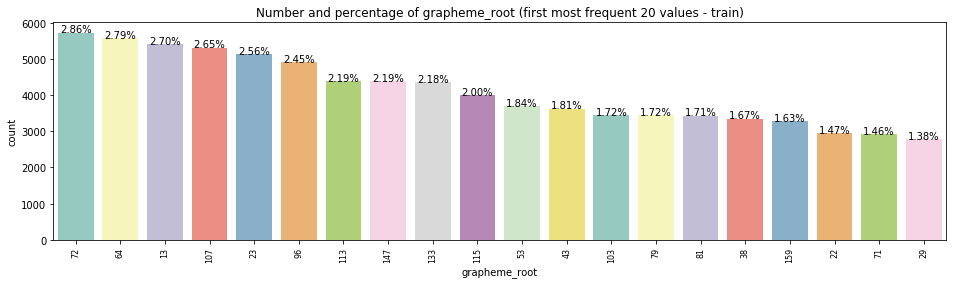

In [26]:
plot_count('grapheme_root', 'grapheme_root (first most frequent 20 values - train)', train_df, size=4)

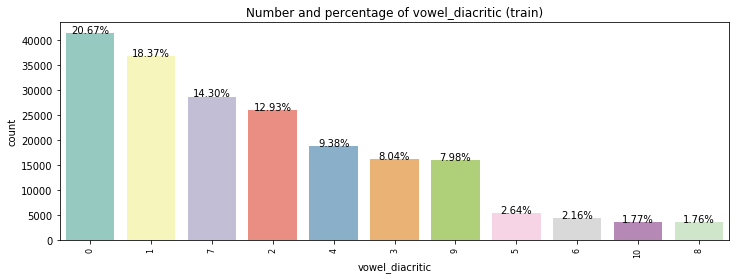

In [27]:
plot_count('vowel_diacritic', 'vowel_diacritic (train)', train_df, size=3)

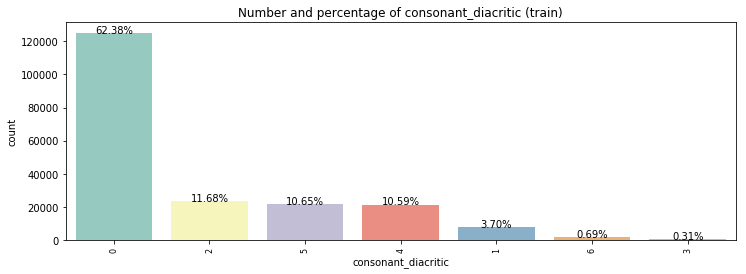

In [28]:
plot_count('consonant_diacritic', 'consonant_diacritic (train)', train_df, size=3)

Let's show now distribution of combinations of features. We create a function to show a heatmap.

In [29]:
def plot_count_heatmap(feature1, feature2, df, size=1):  
    '''
    Heatmap showing the distribution of couple of features
    param: feature1 - ex: vowel_diacritic
    param: feature2 - ex: consonant_diacritic
    '''
    tmp = train_df.groupby([feature1, feature2])['grapheme'].count()
    df = tmp.reset_index()
    df
    df_m = df.pivot(feature1, feature2, "grapheme")
    f, ax = plt.subplots(figsize=(9, size * 4))
    sns.heatmap(df_m, annot=True, fmt='3.0f', linewidths=.5, ax=ax)

Let's see first what consonant diacritics and vowel diacritics appears together.

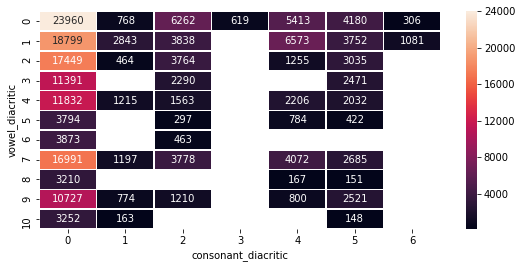

In [30]:
plot_count_heatmap('vowel_diacritic','consonant_diacritic', train_df)

We look now to the combinations of consonant diacritic and grapheme roots.

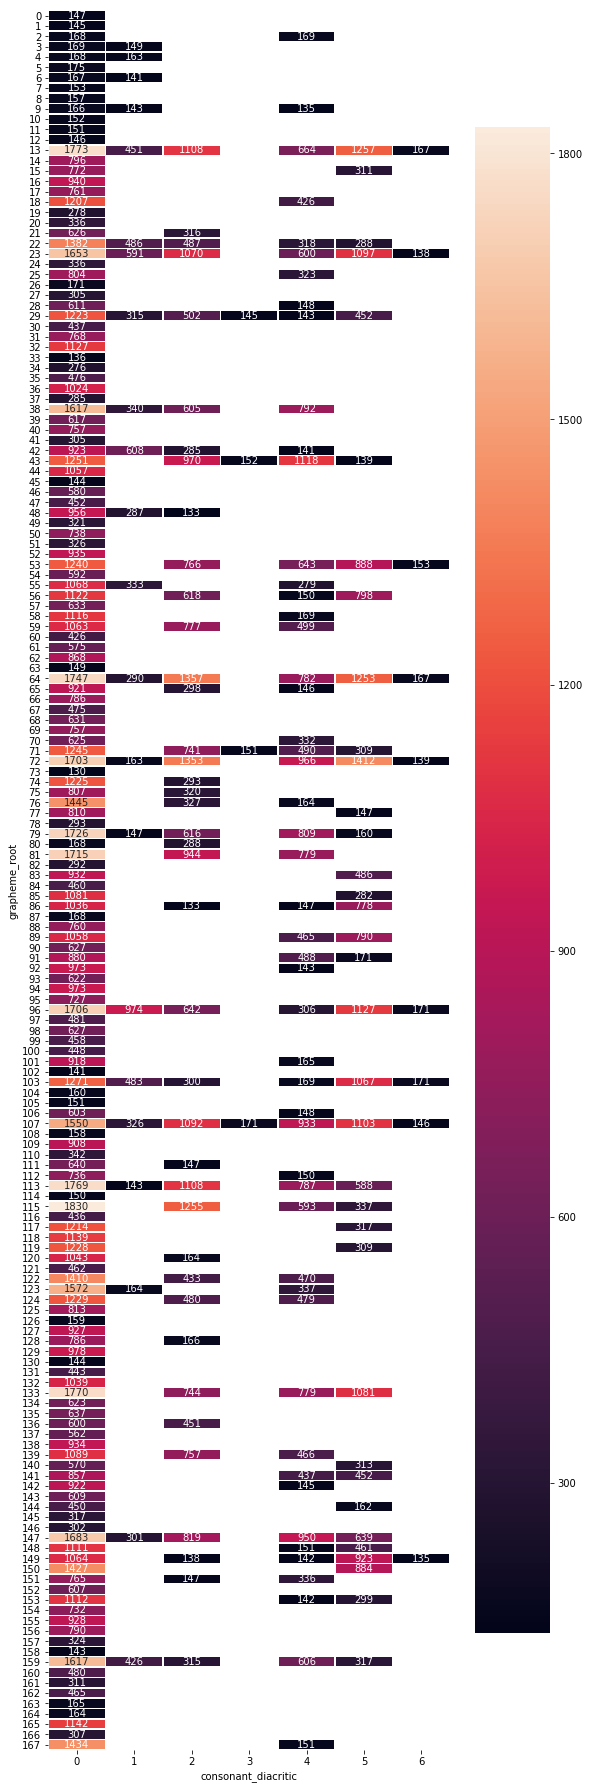

In [31]:
plot_count_heatmap('grapheme_root','consonant_diacritic', train_df, size=8)

Here is the combinations of vowel diacritic and grapheme roots.

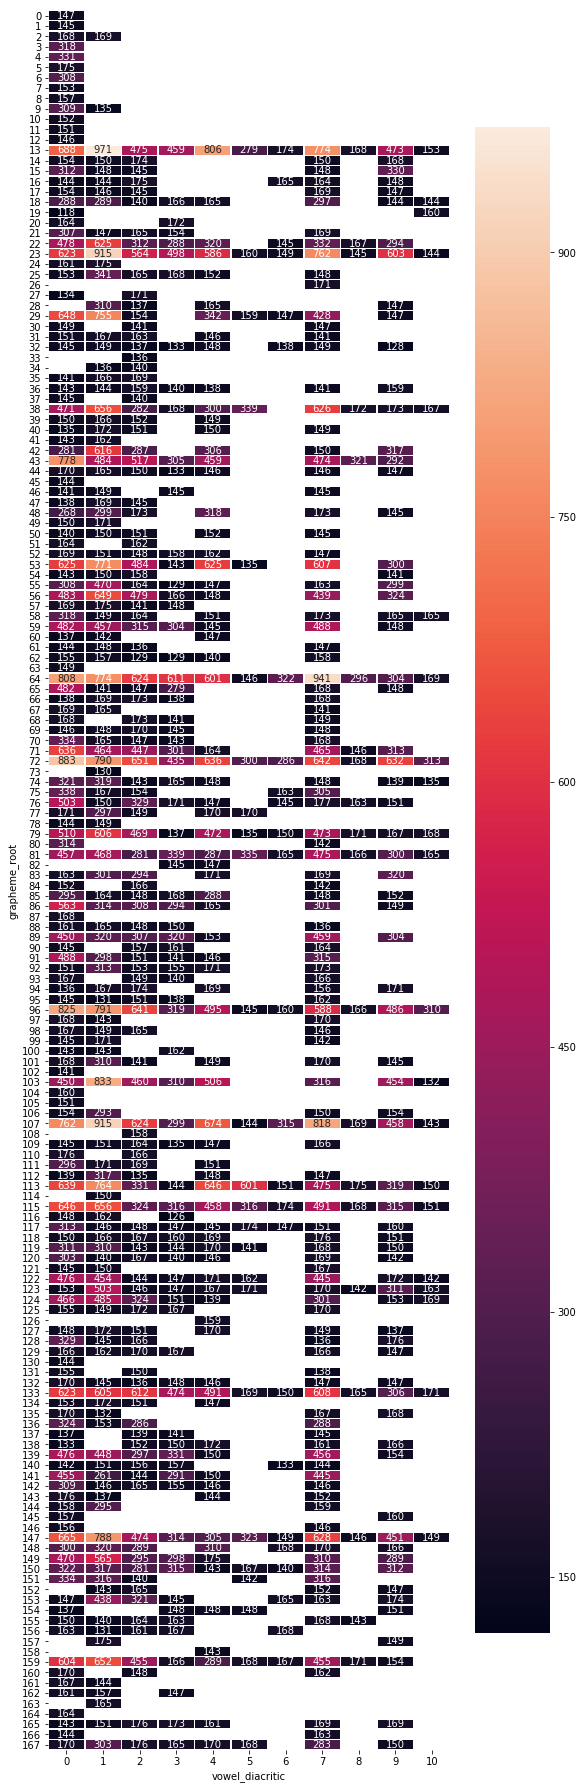

In [32]:
plot_count_heatmap('grapheme_root','vowel_diacritic', train_df, size=8)

## Inspect grapheme images


We define a function to show a sample of size * size (ex: 5 x 5 = 25) handwritten graphemes.

In [33]:
def display_image_from_data(data_df, size=5):
    '''
    Display grapheme images from sample data
    param: data_df - sample of data
    param: size - sqrt(sample size of data)
    '''
    plt.figure()
    fig, ax = plt.subplots(size,size,figsize=(12,12))
    # we show grapheme images for a selection of size x size samples
    for i, index in enumerate(data_df.index):
        image_id = data_df.iloc[i]['image_id']
        flattened_image = data_df.iloc[i].drop('image_id').values.astype(np.uint8)
        unpacked_image = PIL.Image.fromarray(flattened_image.reshape(137, 236))

        ax[i//size, i%size].imshow(unpacked_image)
        ax[i//size, i%size].set_title(image_id)
        ax[i//size, i%size].axis('on')

<Figure size 432x288 with 0 Axes>

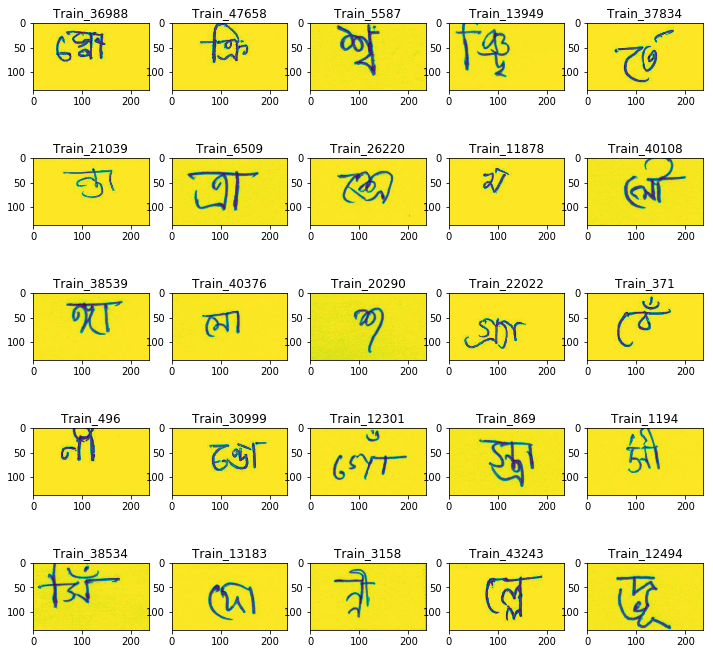

In [34]:
display_image_from_data(train_0_df.sample(25))

We show also a sample from the second set of images and with fewer samples size (16).

<Figure size 432x288 with 0 Axes>

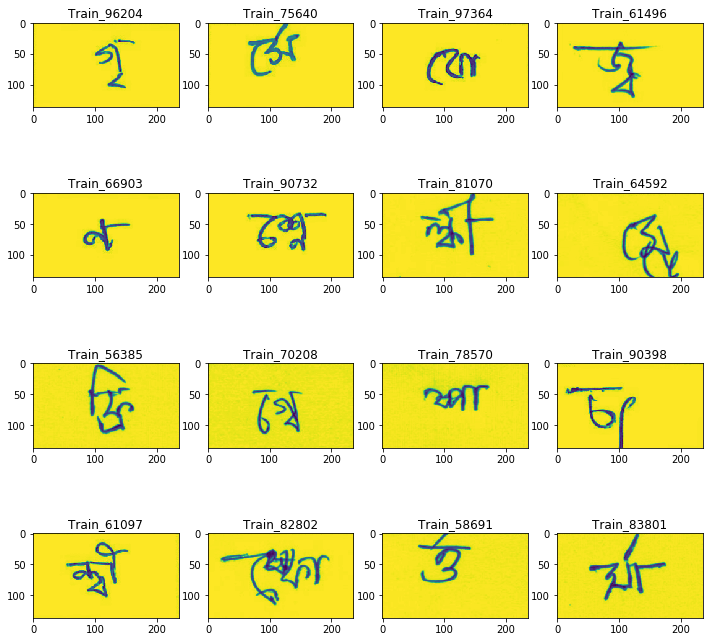

In [35]:
display_image_from_data(train_1_df.sample(16), size = 4)

Let's apply this function, this time to show not random graphemes, but the same grapheme, with different writing.   

For this we create a second function, to perform the sampling (based on variation of grapheme root, vowel diacritic and consonant diacritic, as parameters to the function).

In [36]:
def display_writting_variety(data_df=train_0_df, grapheme_root=72, vowel_diacritic=0,\
                             consonant_diacritic=0, size=5):
    '''
    This function get a set of grapheme root, vowel diacritic and consonant diacritic
    and display a sample of 25 images for this grapheme
    param: data_df - the dataset used as source of data
    param: grapheme_root - the grapheme root label
    param: vowel_diacritic - the vowel diacritic label
    param: consonant_diacritic - the consonant diacritic label 
    param: size - sqrt(number of images to show)
    '''
    sample_train_df = train_df.loc[(train_df.grapheme_root == grapheme_root) & \
                                  (train_df.vowel_diacritic == vowel_diacritic) & \
                                  (train_df.consonant_diacritic == consonant_diacritic)]
    print(f"total: {sample_train_df.shape}")
    sample_df = data_df.merge(sample_train_df.image_id, how='inner')
    print(f"total: {sample_df.shape}")
    gr = sample_train_df.iloc[0]['grapheme']
    cm_gr = class_map_df.loc[(class_map_df.component_type=='grapheme_root')& \
                             (class_map_df.label==grapheme_root), 'component'].values[0]
    cm_vd = class_map_df.loc[(class_map_df.component_type=='vowel_diacritic')& \
                             (class_map_df.label==vowel_diacritic), 'component'].values[0]    
    cm_cd = class_map_df.loc[(class_map_df.component_type=='consonant_diacritic')& \
                             (class_map_df.label==consonant_diacritic), 'component'].values[0]    
    
    print(f"grapheme: {gr}, grapheme root: {cm_gr}, vowel discritic: {cm_vd}, consonant diacritic: {cm_cd}")
    sample_df = sample_df.sample(size * size)
    display_image_from_data(sample_df, size=size)

We apply the function for few combinations of grapheme root, vowel diacritic and consonant diacritic.

total: (163, 5)
total: (36, 32333)
grapheme: দাঁ, grapheme root: দ, vowel discritic: া, consonant diacritic: ঁ


<Figure size 432x288 with 0 Axes>

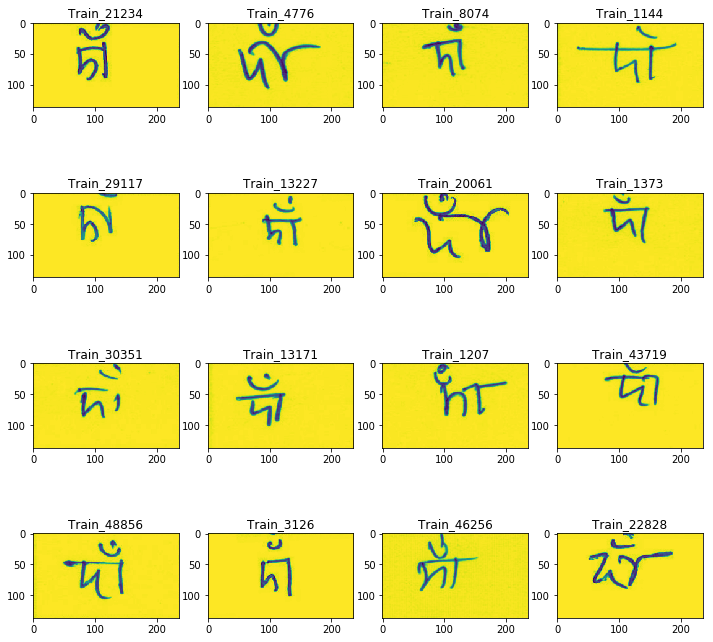

In [37]:
display_writting_variety(train_0_df,72,1,1,4)

total: (150, 5)
total: (29, 32333)
grapheme: র্তা, grapheme root: ত, vowel discritic: া, consonant diacritic: র্


<Figure size 432x288 with 0 Axes>

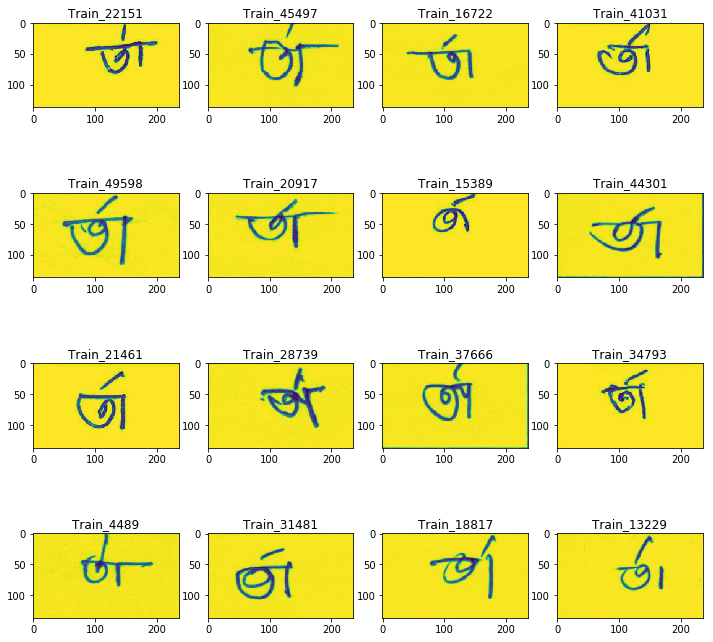

In [38]:
display_writting_variety(train_0_df,64,1,2,4)

total: (175, 5)
total: (38, 32333)
grapheme: ক, grapheme root: ক, vowel discritic: 0, consonant diacritic: 0


<Figure size 432x288 with 0 Axes>

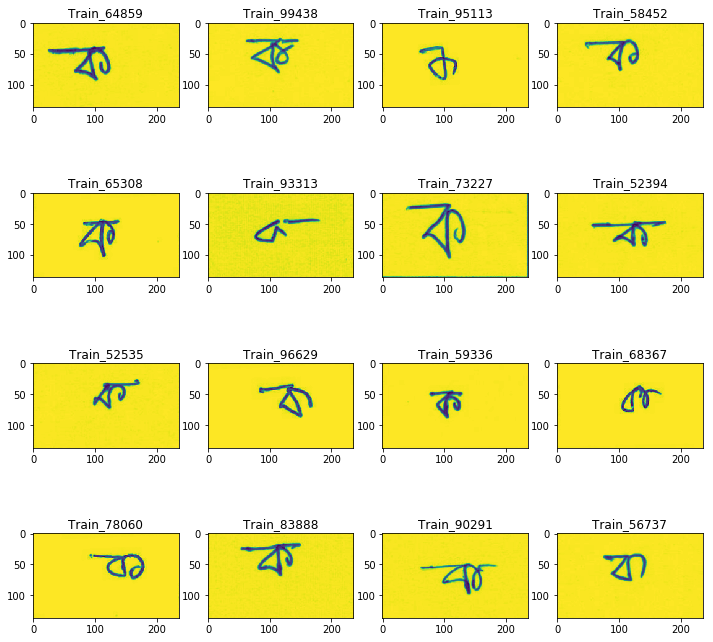

In [39]:
display_writting_variety(train_1_df,13,0,0,4)

total: (167, 5)
total: (46, 32333)
grapheme: র্গী, grapheme root: গ, vowel discritic: ী, consonant diacritic: র্


<Figure size 432x288 with 0 Axes>

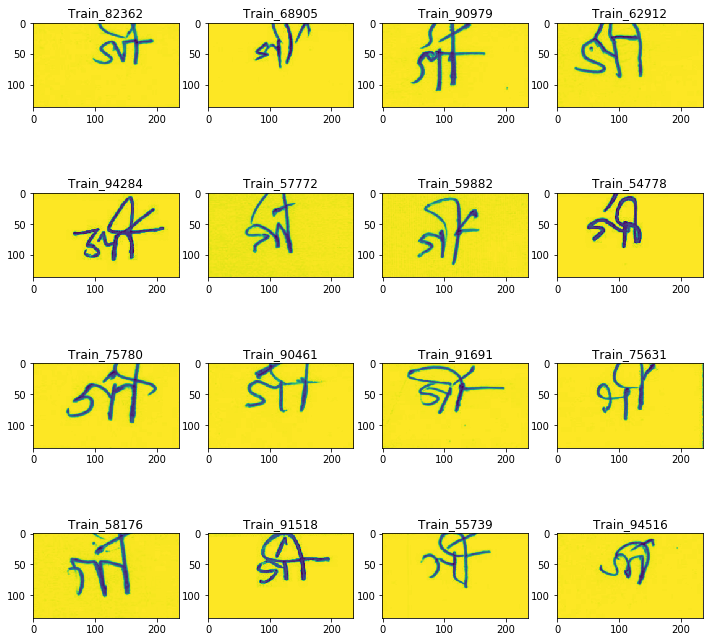

In [40]:
display_writting_variety(train_1_df,23,3,2,4)

We can observe there is a large variety of writting for the selected graphemes.